<a href="https://colab.research.google.com/github/wenjunsun/Covid-19-analysis-with-uw-ubicomp/blob/master/week11/plot_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will plot the time series of percentage of home dwell time, percentage of full time and part time behaviors in a county, to see if data makes sense.

In [1]:
cd drive/My\ Drive/week11

/content/drive/My Drive/week11


In [2]:
ls

aggregated_data.csv  plot_time_series.ipynb


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('aggregated_data.csv', parse_dates=['date_range_start'], infer_datetime_format=True)

In [5]:
data.head()

date_range_start  state  ... home_dwell_time non_home_dwell_time
0       2019-01-01    1.0  ...       4019193.0            162117.0
1       2019-01-01    1.0  ...      14443397.0            684136.0
2       2019-01-01    1.0  ...       1009240.0             66210.0
3       2019-01-01    1.0  ...       1450137.0             87795.0
4       2019-01-01    1.0  ...       4620005.0            261769.0

[5 rows x 10 columns]

In [6]:
# calculate average percentage of time people spend at home. 
data['perc_time_home'] = data.apply(lambda row: row['home_dwell_time'] / (row['home_dwell_time'] + row['non_home_dwell_time']), axis = 1)

In [7]:
data.head()

date_range_start  state  ... non_home_dwell_time perc_time_home
0       2019-01-01    1.0  ...            162117.0       0.961228
1       2019-01-01    1.0  ...            684136.0       0.954775
2       2019-01-01    1.0  ...             66210.0       0.938435
3       2019-01-01    1.0  ...             87795.0       0.942914
4       2019-01-01    1.0  ...            261769.0       0.946378

[5 rows x 11 columns]

In [8]:
import matplotlib.pyplot as plt

In [11]:
# get king_county's data
small_data = data[data['county_code'] == 53033]

In [12]:
small_data

date_range_start  state  ... non_home_dwell_time perc_time_home
2966          2019-01-01   53.0  ...           4030288.0       0.947789
6192          2019-01-02   53.0  ...           8105451.0       0.889023
9418          2019-01-03   53.0  ...           8517352.0       0.884923
12644         2019-01-04   53.0  ...           9448583.0       0.874201
15870         2019-01-05   53.0  ...           4960347.0       0.938959
...                  ...    ...  ...                 ...            ...
1876623       2020-08-04   53.0  ...           4665696.0       0.936848
1879849       2020-08-05   53.0  ...           4781856.0       0.934487
1883074       2020-08-06   53.0  ...           4337102.0       0.941200
1886300       2020-08-07   53.0  ...           5716823.0       0.918508
1889526       2020-08-08   53.0  ...           4250664.0       0.938057

[586 rows x 11 columns]

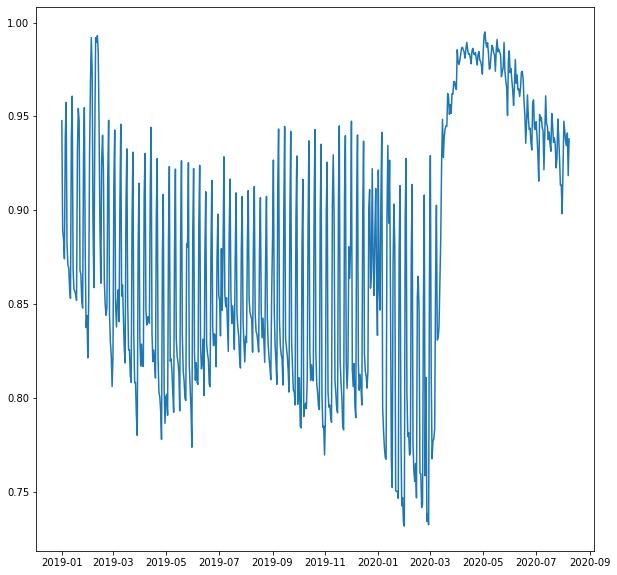

In [13]:
plt.figure(figsize= (10, 10))
plt.plot(small_data['date_range_start'], small_data['perc_time_home'])

As we can see, the percentage of staying at home time increases around mid march, which is pretty plausible

In [20]:
def plot_time_series(county_code, variable):
  this_county_data = data[data['county_code'] == county_code]
  plt.figure(figsize = (12, 10))
  plt.plot(this_county_data['date_range_start'], this_county_data[variable])
  plt.xlabel('date')
  plt.ylabel(variable)
  county_name = this_county_data.iloc[0]['cnamelong']
  state_of_county = this_county_data.iloc[0]['state_code']
  plt.title(f'time series of {variable} with respect to date in {county_name} in state {state_of_county}')

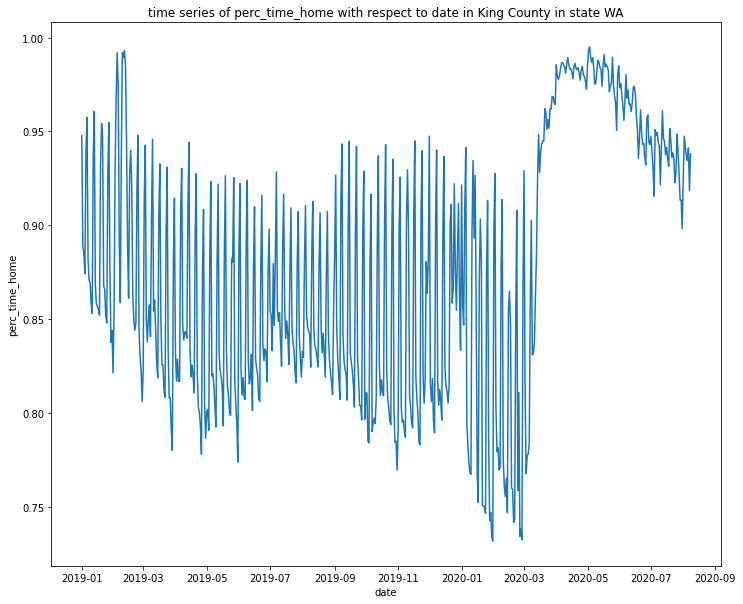

In [21]:
plot_time_series(county_code = 53033, variable = 'perc_time_home')

In [22]:
county_code_array = data['county_code'].unique() 

In [24]:
len(county_code_array)

3228

In [25]:
import random

In [26]:
# random.choice select a random element within an iteratble
# in this case it randomly selects a county_code.
random.choice(county_code_array)

4003.0

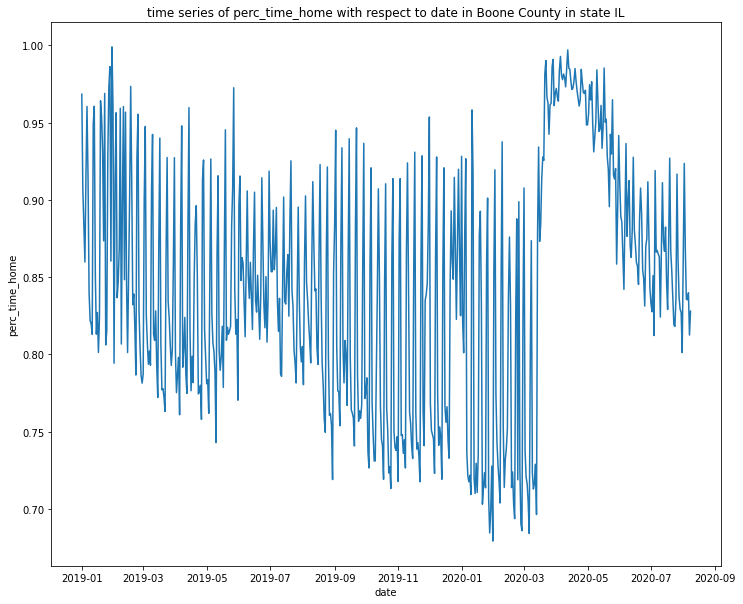

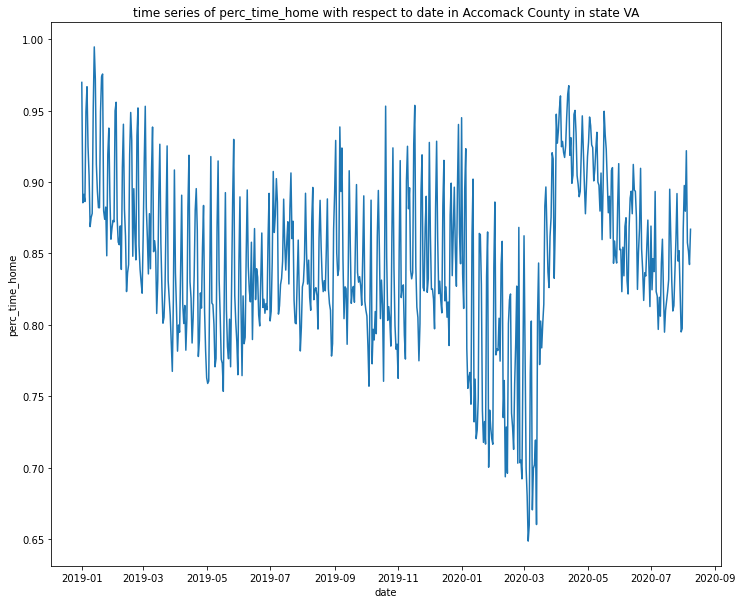

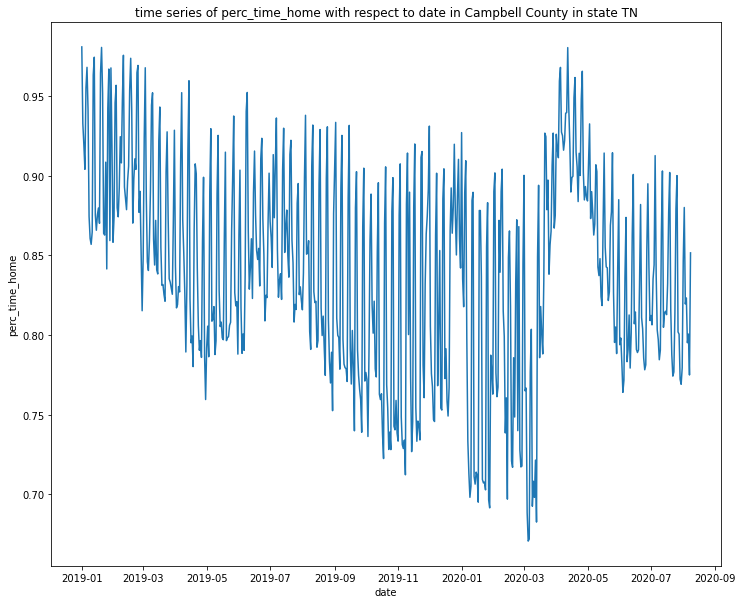

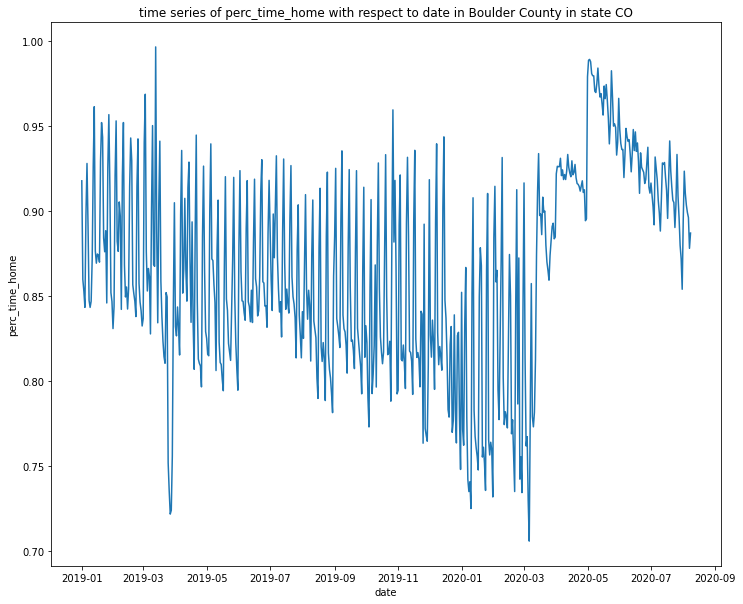

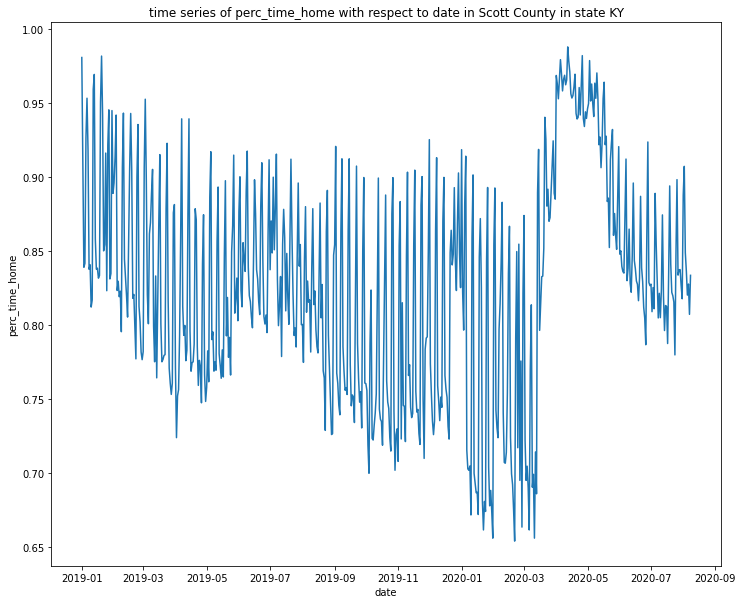

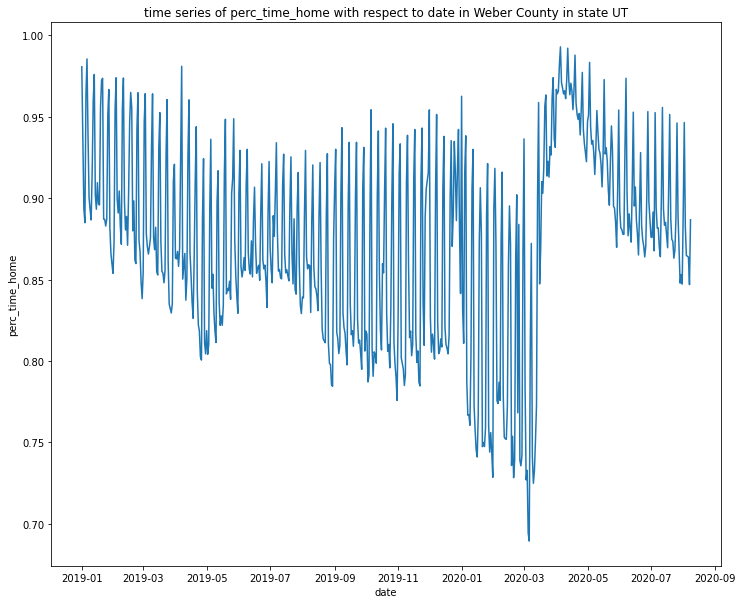

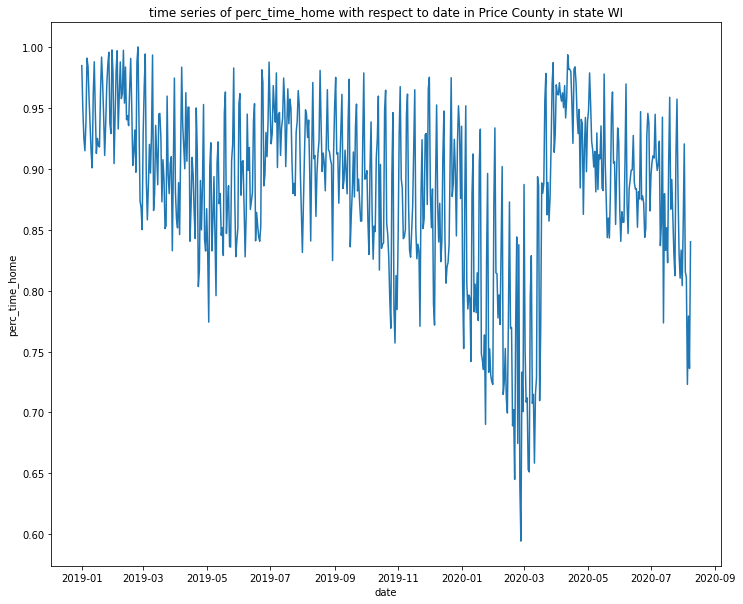

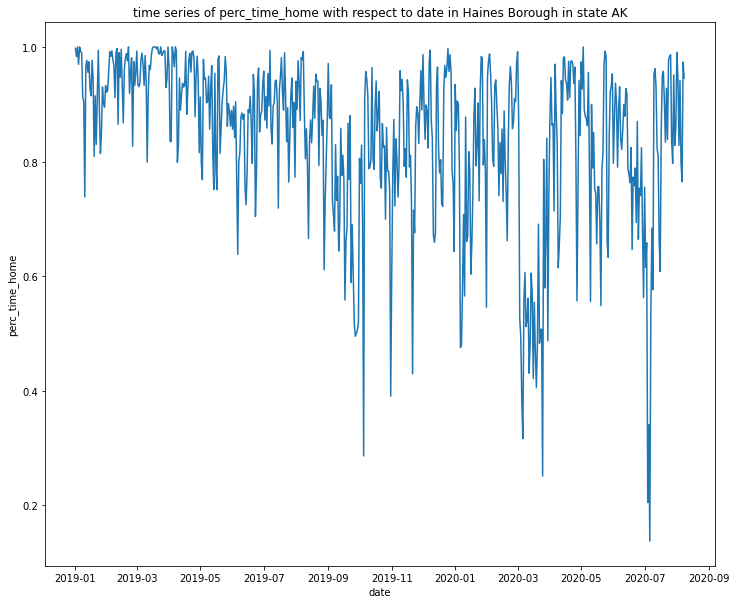

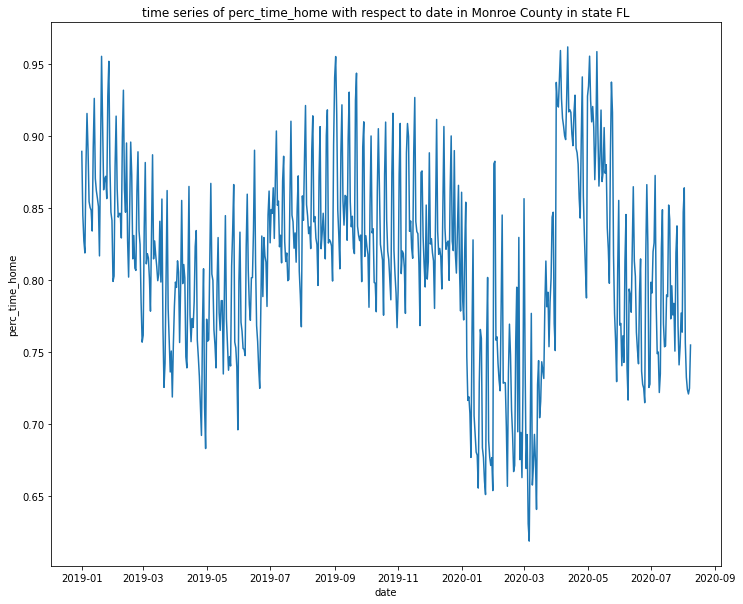

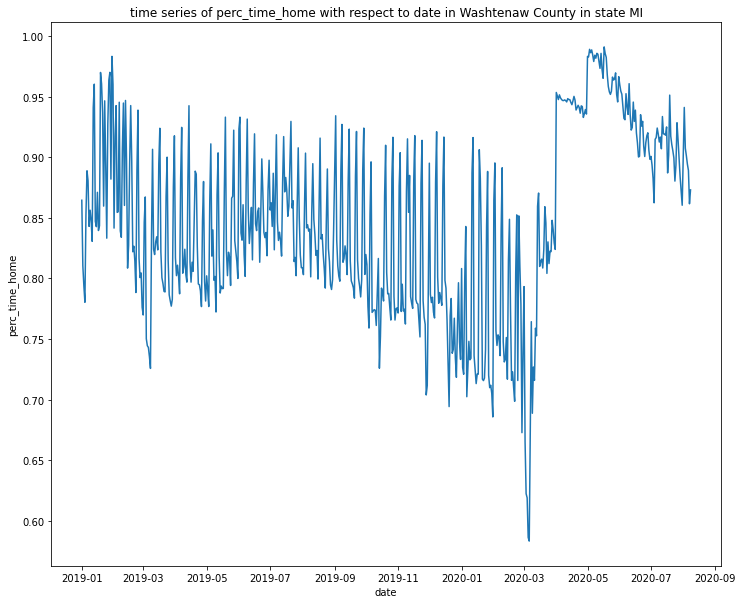

In [28]:
# plot perc_time_home time series of 10 random counties.
for i in range(10):
  random_county_code = random.choice(county_code_array)
  plot_time_series(county_code = random_county_code, variable = 'perc_time_home')

As we can see, most counties have change in percentage of time spent at home after covid, which is what we expect

In [29]:
# create perc_full_time_work_devices
data['perc_full_time'] = data['full_time_work_behavior_devices'] / data['device_count']

In [30]:
# create perc_part_time_work_devices
data['perc_part_time'] = data['part_time_work_behavior_devices'] / data['device_count']

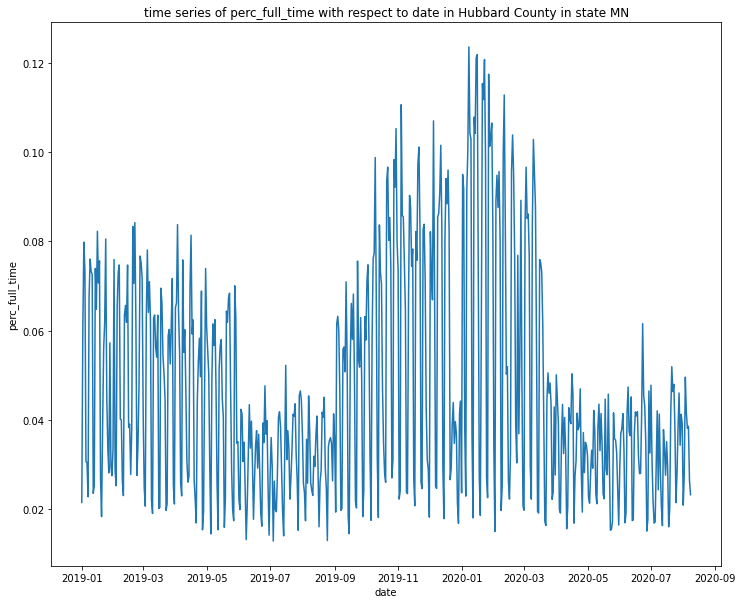

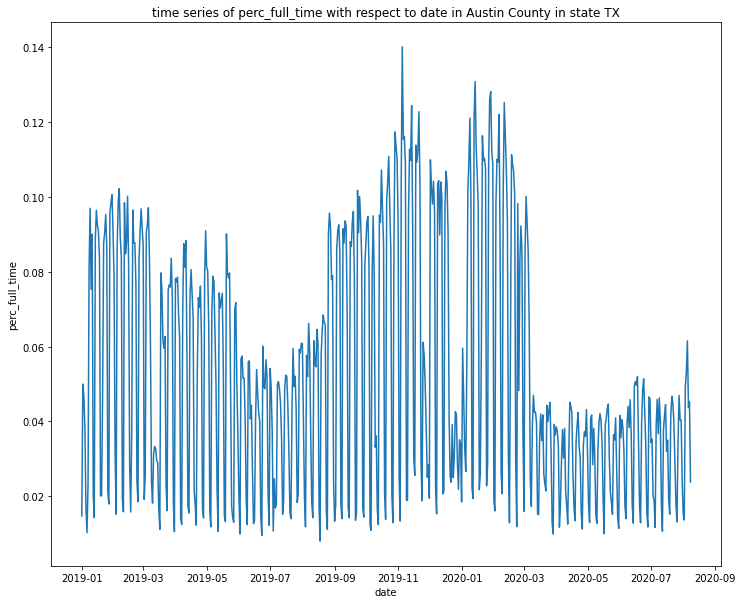

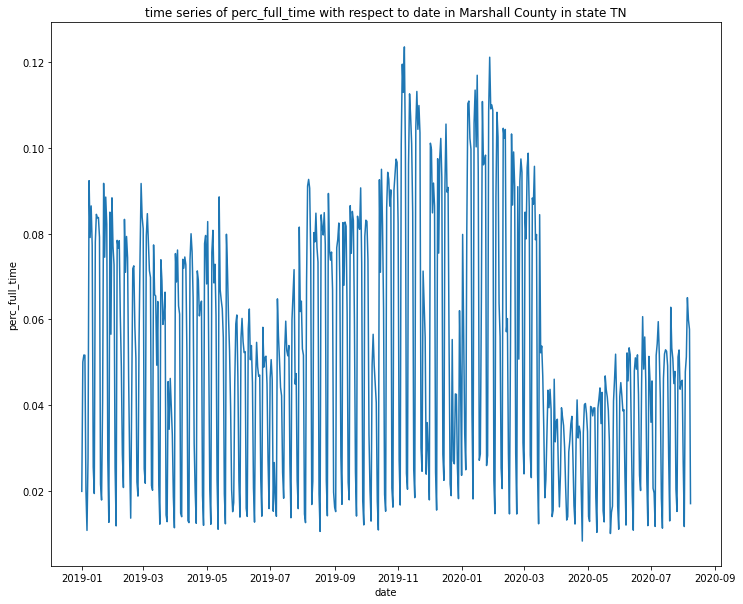

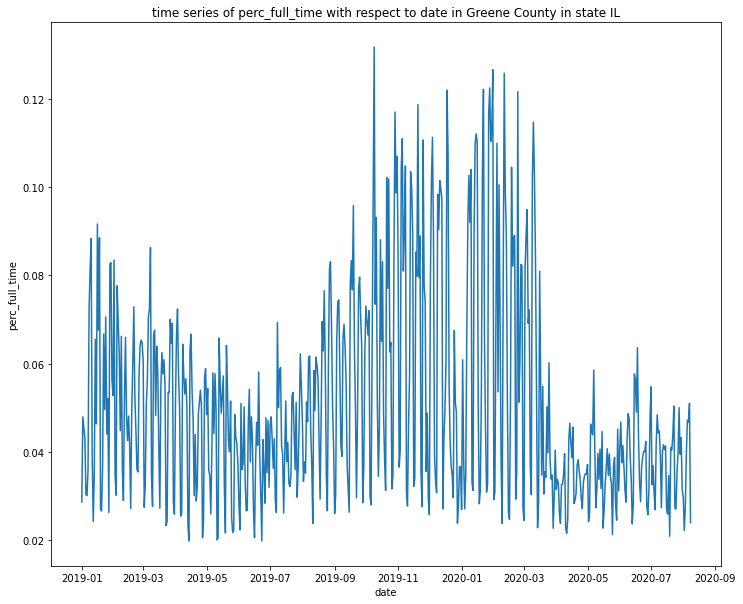

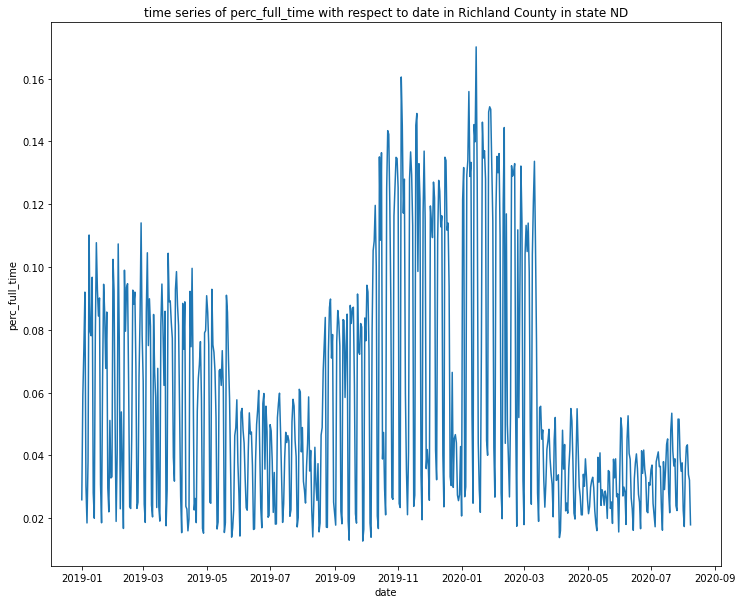

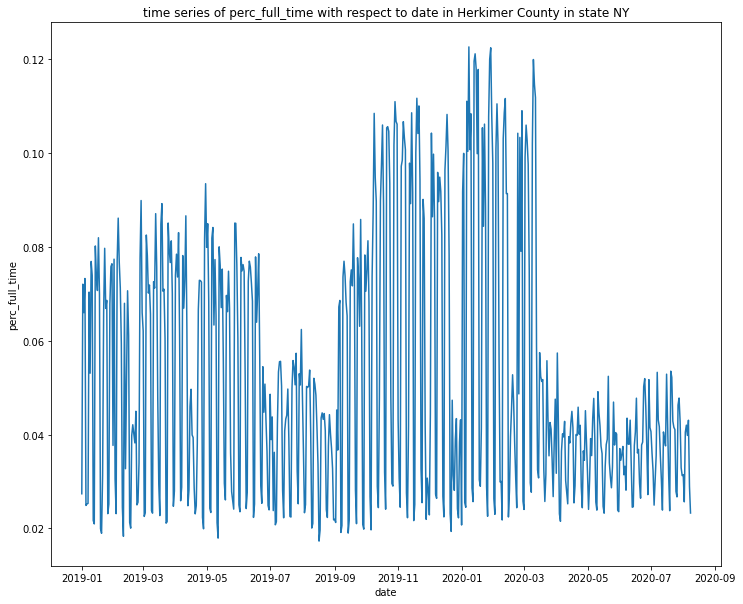

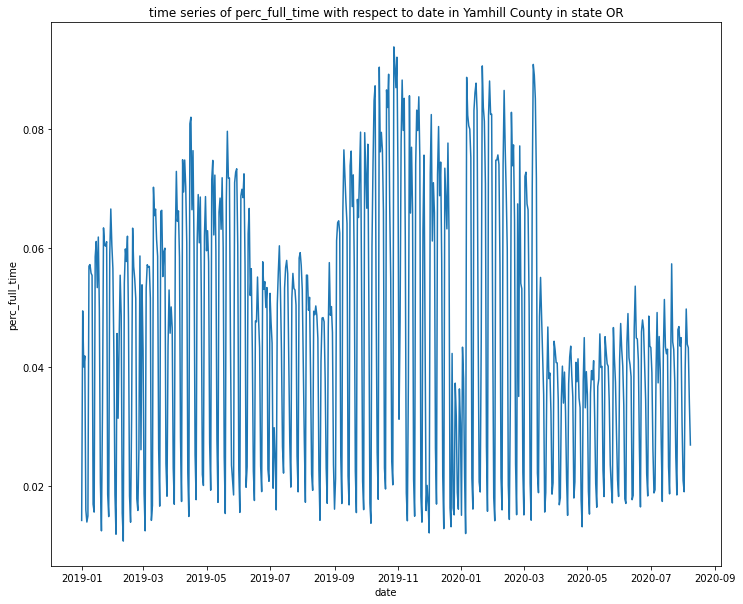

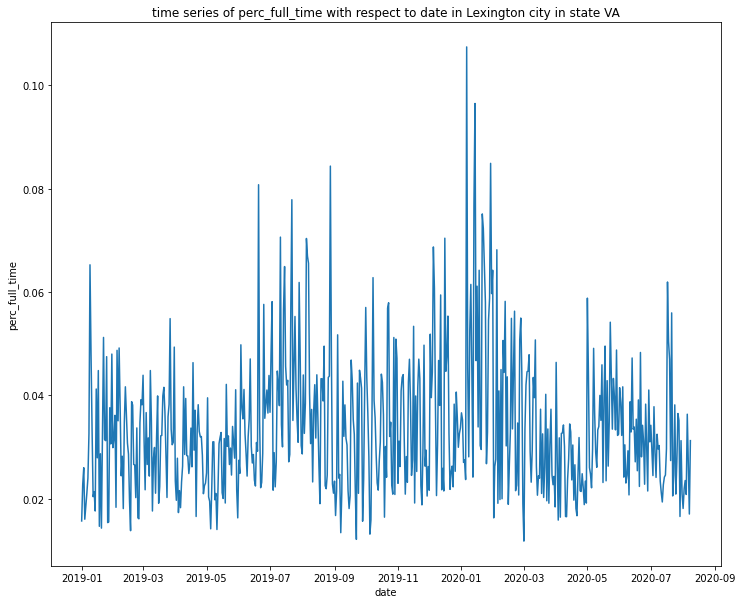

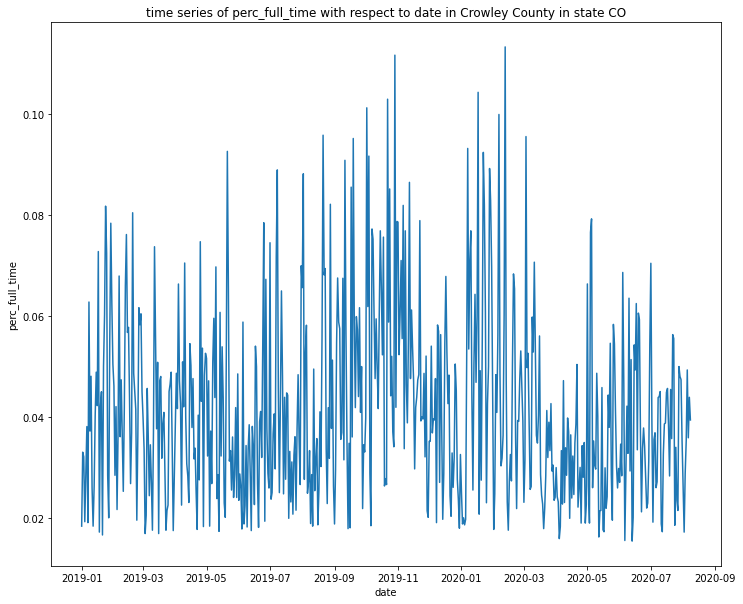

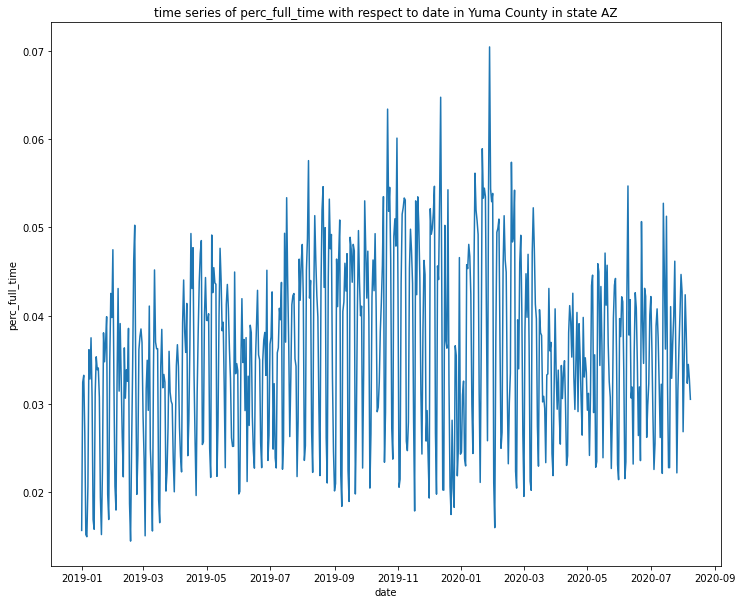

In [31]:
# plot time series of full_time_percantage in 10 random counties.
for i in range(10):
  random_county_code = random.choice(county_code_array)
  plot_time_series(county_code = random_county_code, variable = 'perc_full_time')

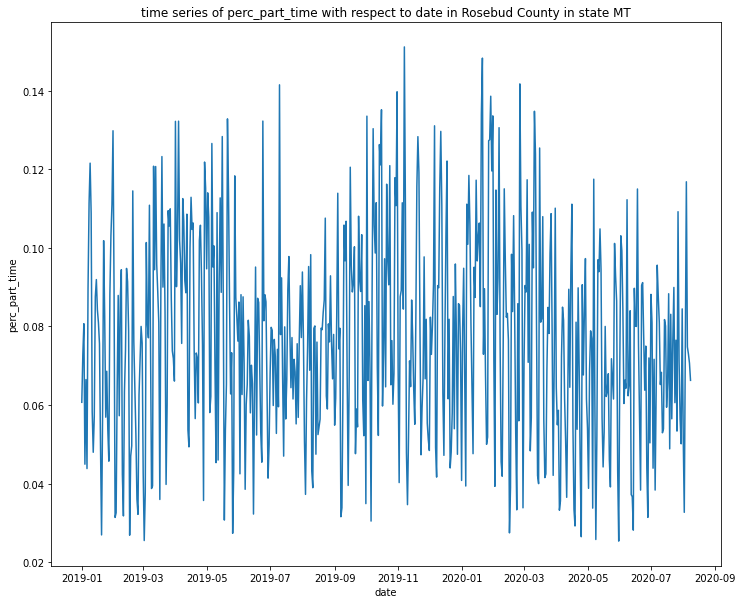

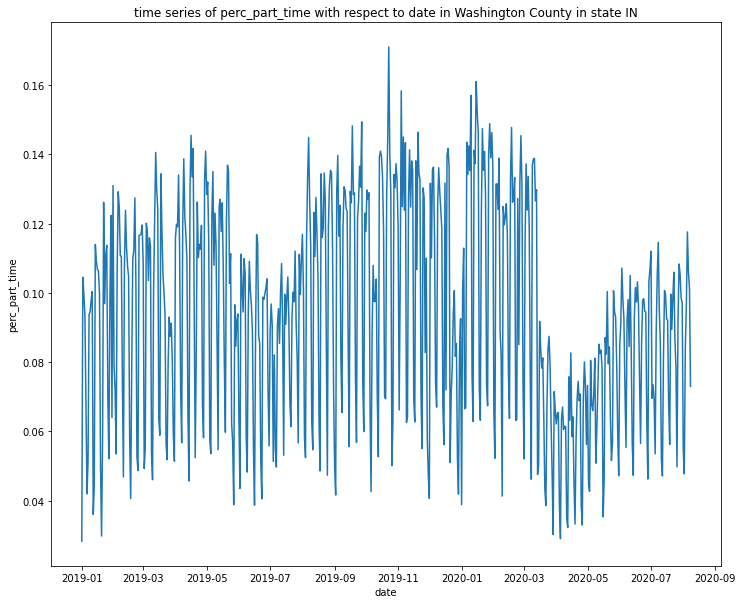

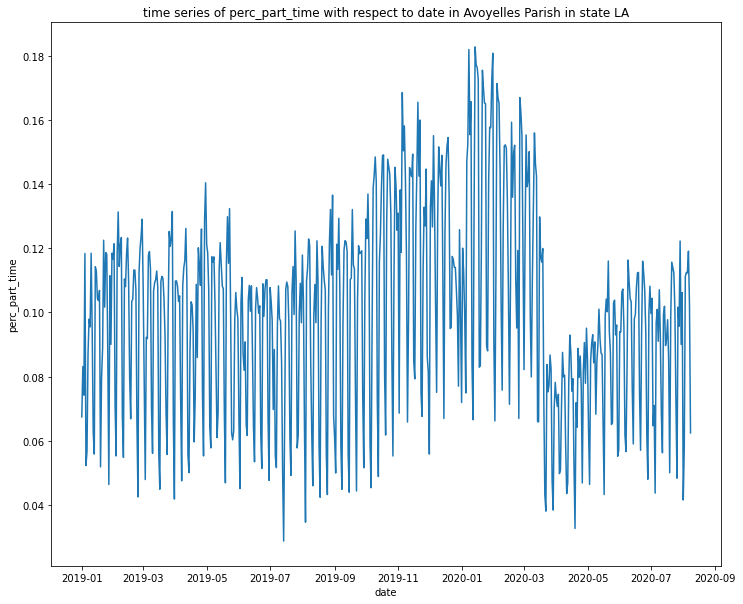

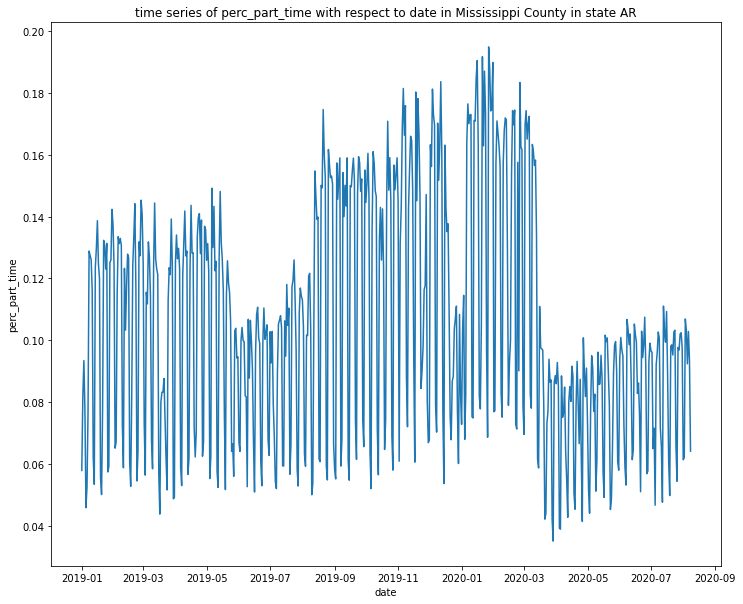

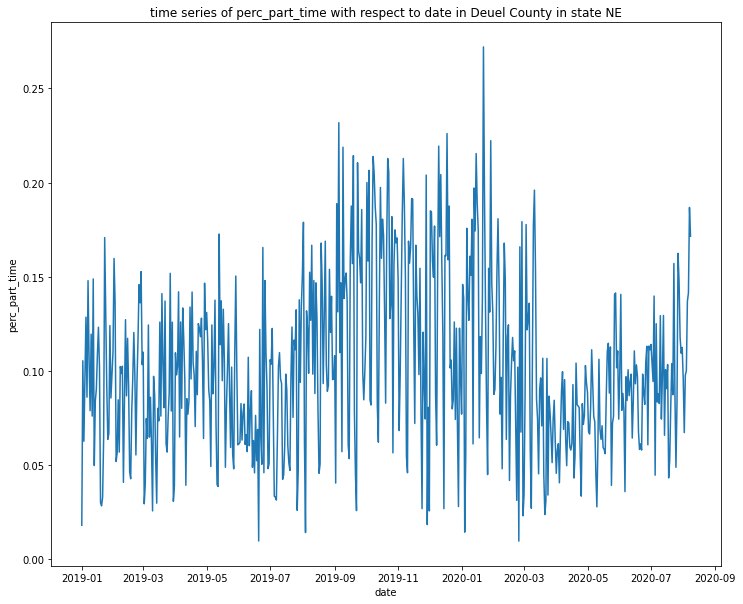

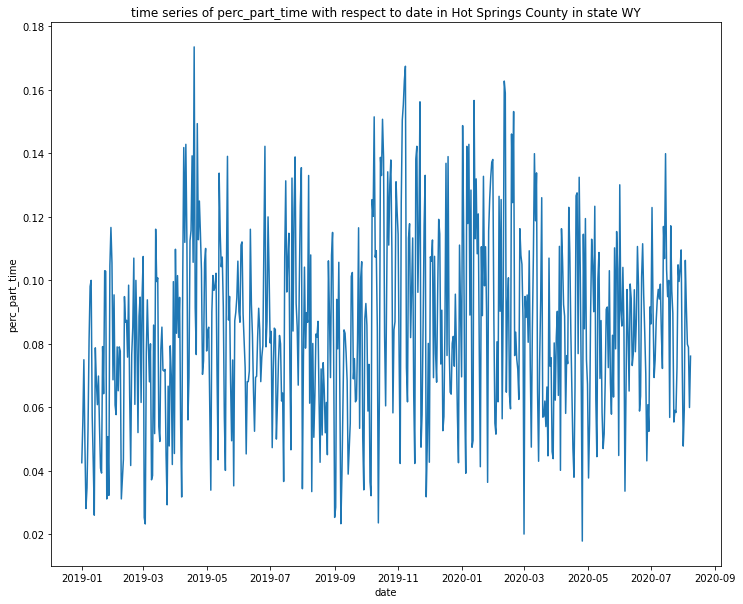

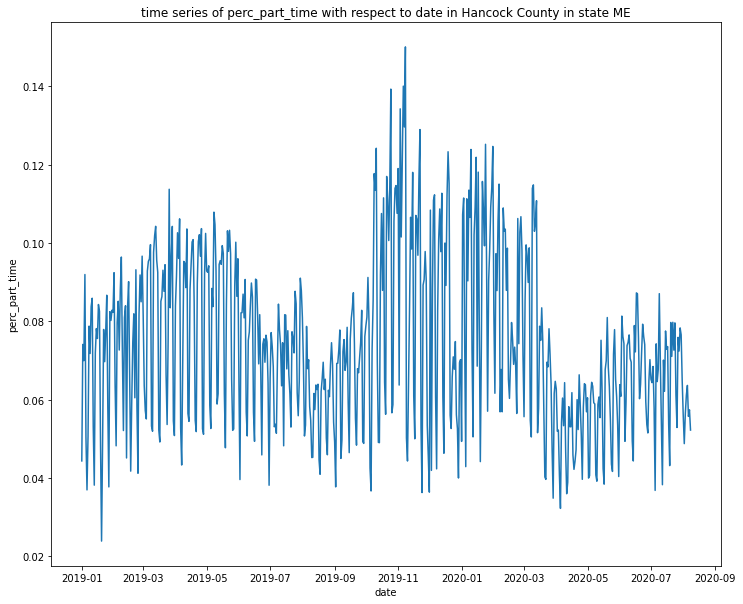

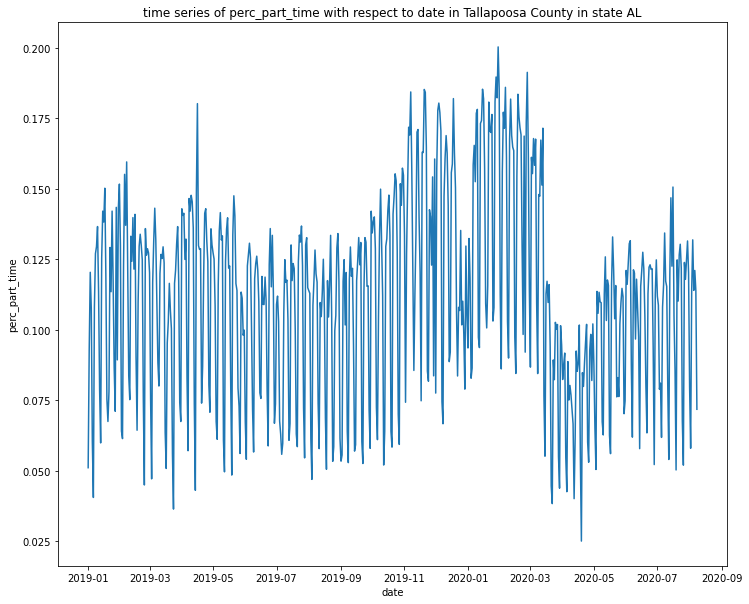

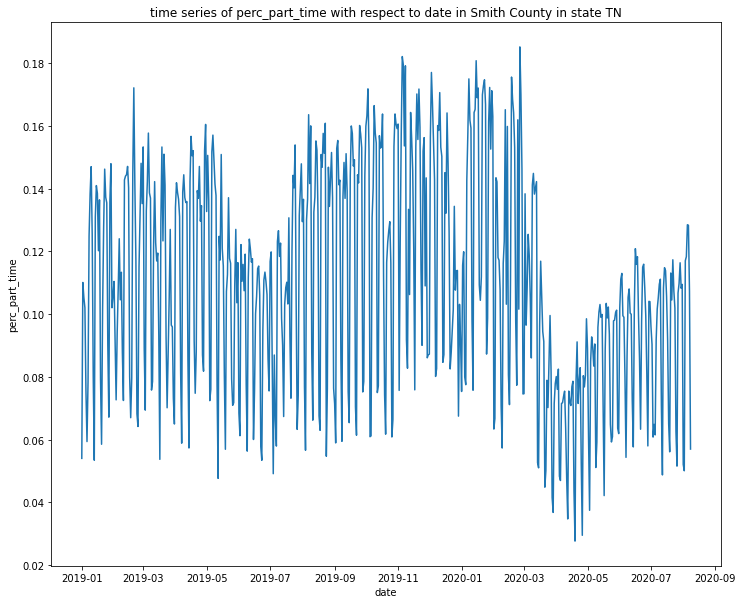

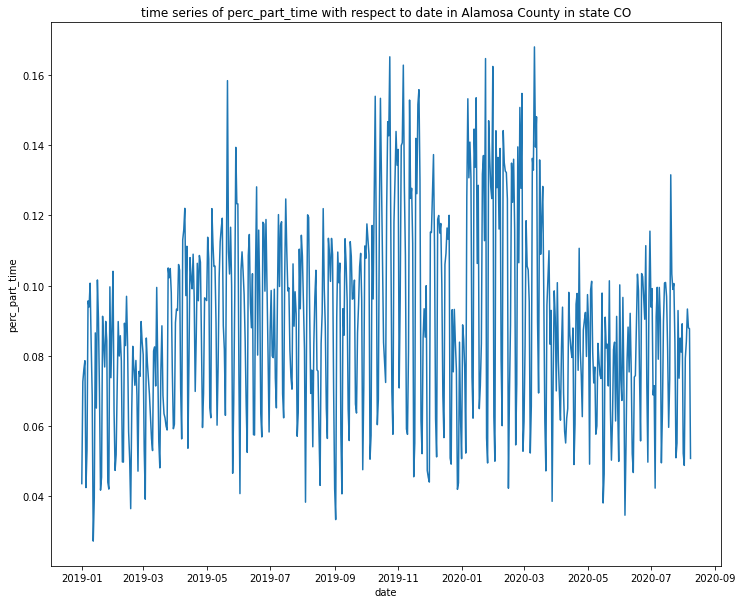

In [32]:
# plot time series of full_time_percantage in 10 random counties.
for i in range(10):
  random_county_code = random.choice(county_code_array)
  plot_time_series(county_code = random_county_code, variable = 'perc_part_time')

We can see that part_time jobs are slowly getting back to normal while full time jobs are not.

**Conclusion:** We can use these 3 variables for our analysis because their time series make sense, no weird outliers like distance_traveled.